In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib.dates import date2num

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
pd.options.display.max_columns = None
display(train.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [6]:
column_with_nan=train.columns[train.isnull().any()]

In [7]:
for column in column_with_nan:
    print(column, train[column].isnull().sum())

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [8]:
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())
train.drop(['Alley'],axis=1,inplace=True)
train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['BsmtQual']=train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
train['FireplaceQu']=train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])
train['GarageType']=train['GarageType'].fillna(train['GarageType'].mode()[0])
train.drop(['GarageYrBlt'],axis=1,inplace=True)
train['GarageFinish']=train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageQual']=train['GarageQual'].fillna(train['GarageQual'].mode()[0])
train['GarageCond']=train['GarageCond'].fillna(train['GarageCond'].mode()[0])
train.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [9]:
column_with_nan1=train.columns[train.isnull().any()]

In [10]:
for column in column_with_nan1:
    print(column, train[column].isnull().sum())

MasVnrType 8
MasVnrArea 8
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1


In [11]:
train['MasVnrType']=train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mode()[0])
train['BsmtExposure']=train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
train['BsmtFinType1']=train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])
train['BsmtFinType2']=train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])
train['Electrical']=train['Electrical'].fillna(train['Electrical'].mode()[0])

In [12]:
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

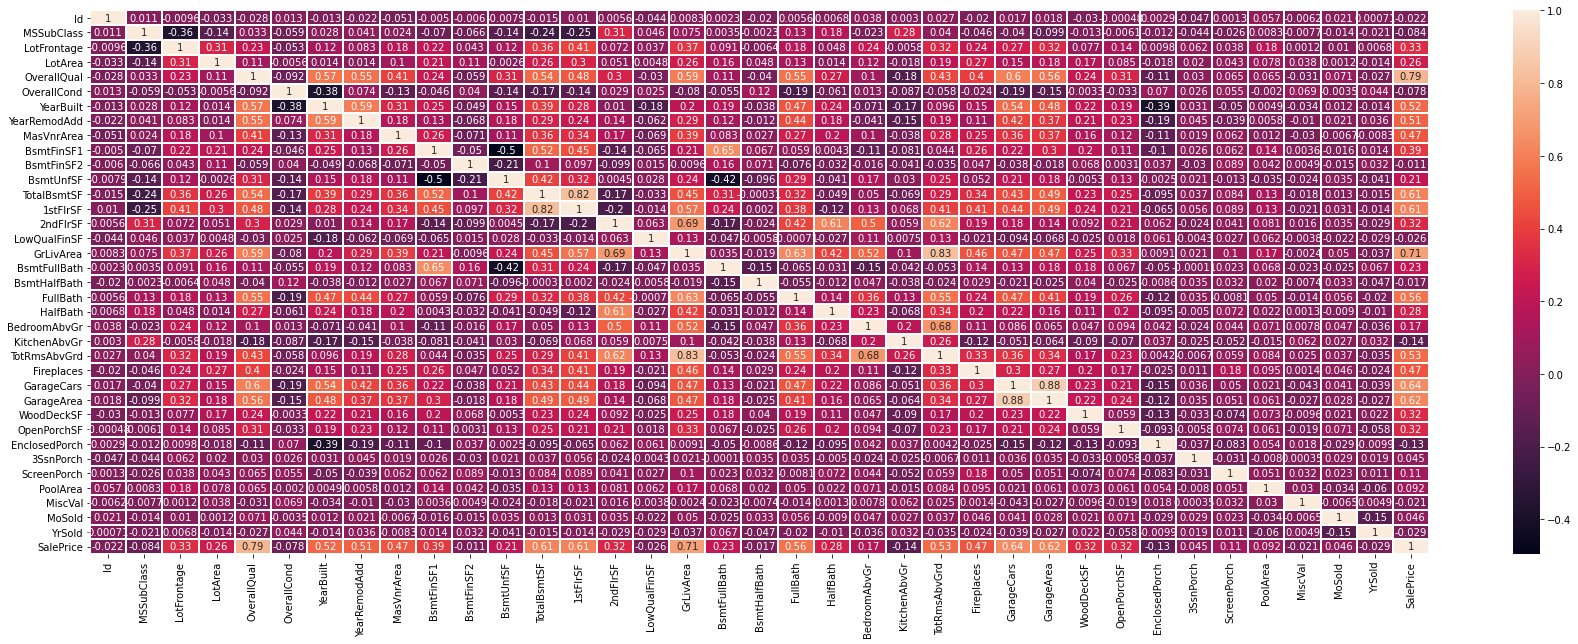

In [13]:
plt.figure(figsize=(30,10))
sns.heatmap(train.corr(), linewidth=1, annot=True)
plt.savefig('housepricecorrelation.png')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


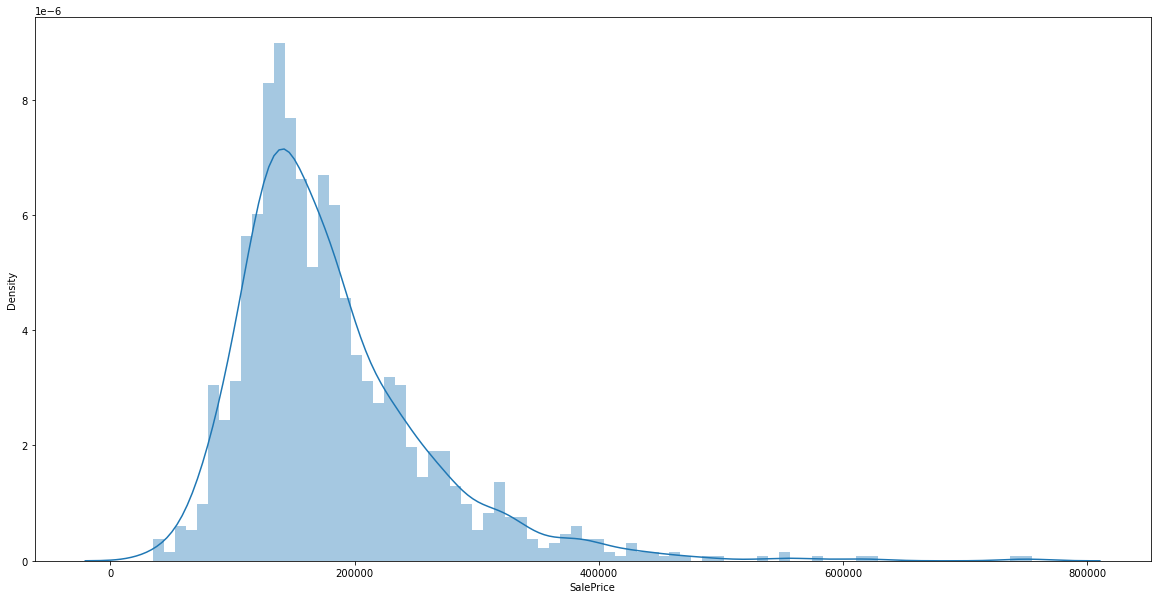

In [14]:
plt.figure(figsize=(20,10))
sns.distplot(train["SalePrice"],bins=80)


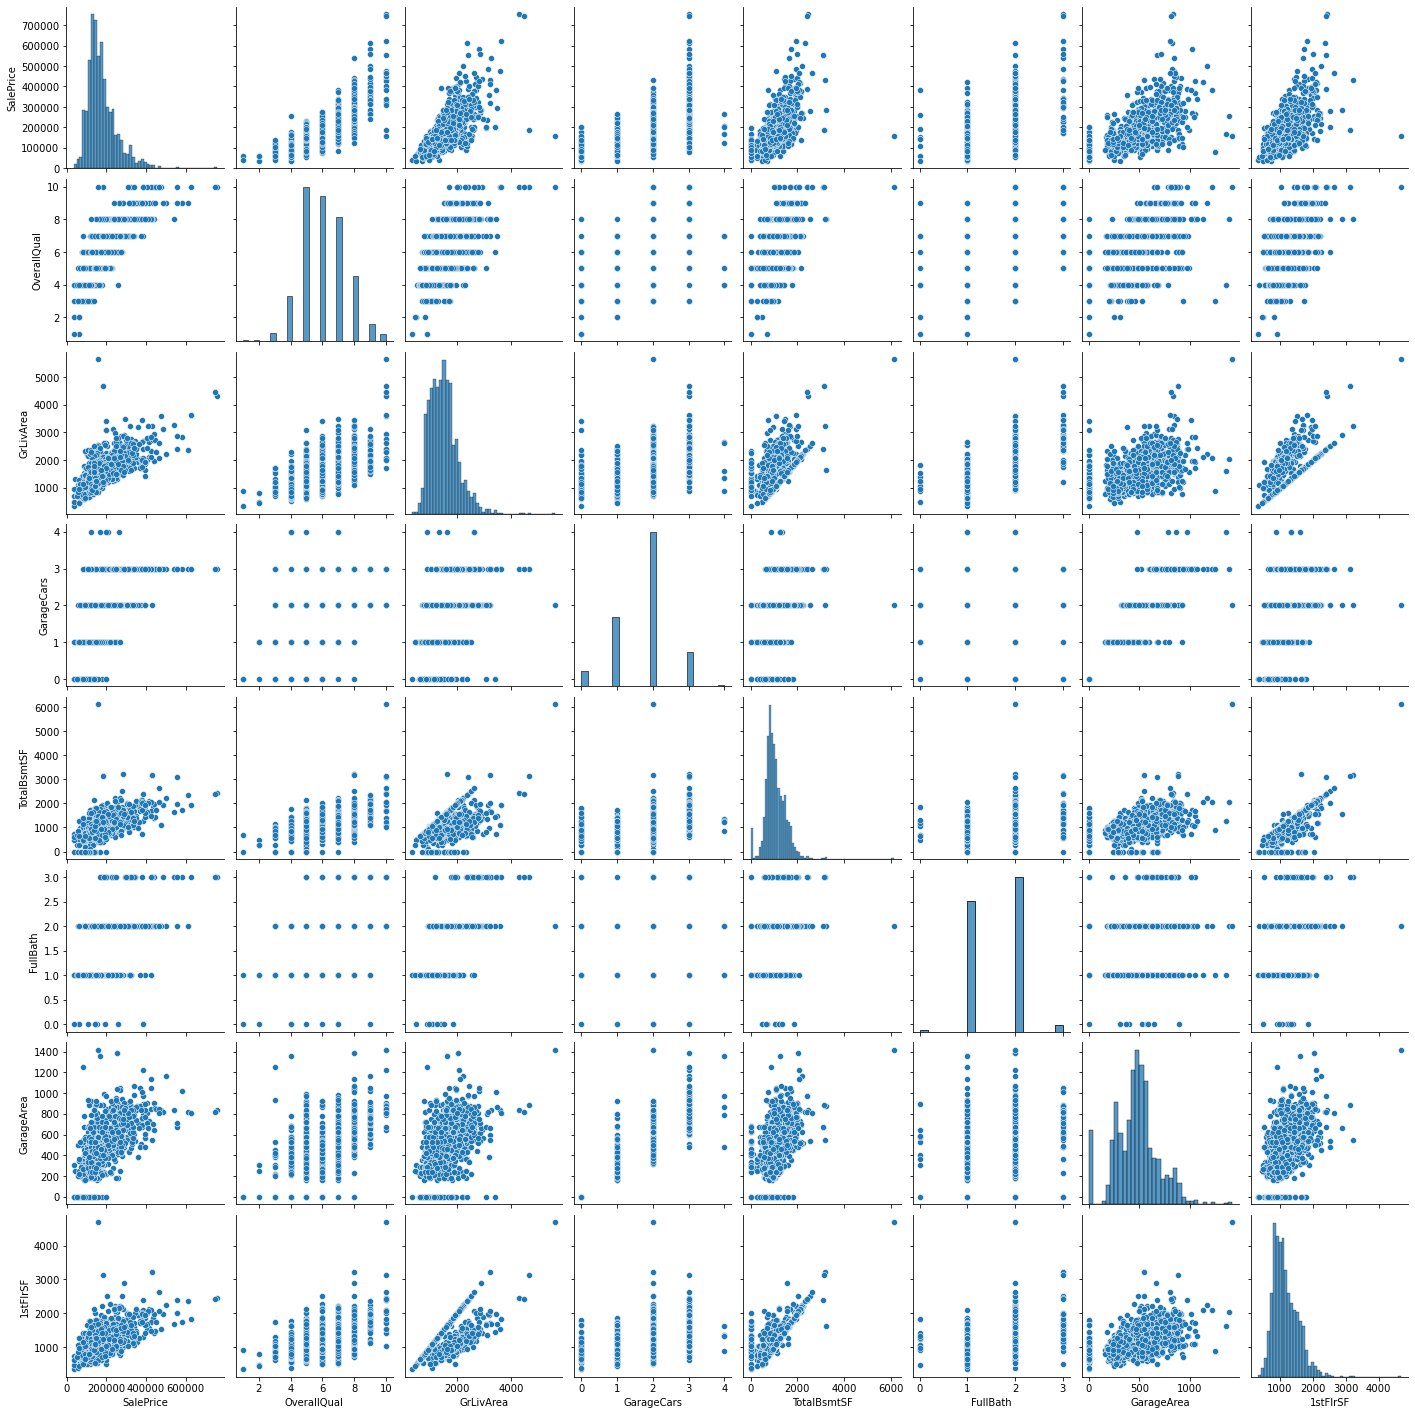

In [15]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath','GarageArea','1stFlrSF']
sns.pairplot(train[cols])
plt.show()

In [16]:
clean_data=train[cols]

In [17]:
clean_data.quantile([0.0, 0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 1.0])

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,GarageArea,1stFlrSF
0.00,34900.00,1.0,334.00,0.0,0.00,0.0,0.00,334.00
0.01,61815.97,3.0,692.18,0.0,0.00,1.0,0.00,520.00
0.05,88000.00,4.0,848.00,0.0,519.30,1.0,0.00,672.95
0.10,106475.00,5.0,912.00,1.0,636.90,1.0,240.00,756.90
0.25,129975.00,5.0,1129.50,1.0,795.75,1.0,334.50,882.00
0.50,163000.00,6.0,1464.00,2.0,991.50,2.0,480.00,1087.00
0.75,214000.00,7.0,1776.75,2.0,1298.25,2.0,576.00,1391.25
0.90,278000.00,8.0,2158.30,3.0,1602.20,2.0,757.10,1680.00
0.95,326100.00,8.0,2466.10,3.0,1753.00,2.0,850.10,1831.25
0.99,442567.01,10.0,3123.48,3.0,2155.05,3.0,1002.79,2219.46


In [18]:
low = .01
high = .99

quant_df = clean_data.quantile([low, high])
quant_df.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,GarageArea,1stFlrSF
0.01,61815.97,3.0,692.18,0.0,0.00,1.0,0.00,520.00
0.99,442567.01,10.0,3123.48,3.0,2155.05,3.0,1002.79,2219.46


In [19]:
clean_data = clean_data.loc[(clean_data["GrLivArea"] < quant_df.loc[high, "GrLivArea"])&
                            (clean_data["TotalBsmtSF"] > quant_df.loc[low, "TotalBsmtSF"]) &
                            (clean_data["TotalBsmtSF"] < quant_df.loc[high, "TotalBsmtSF"]) &
                            (clean_data["GarageArea"] > quant_df.loc[low, "GarageArea"]) &
                            (clean_data["GarageArea"] < quant_df.loc[high, "GarageArea"])&
                            (clean_data["1stFlrSF"] < quant_df.loc[high, "1stFlrSF"])&
                            (clean_data["SalePrice"] < quant_df.loc[high, "SalePrice"])]

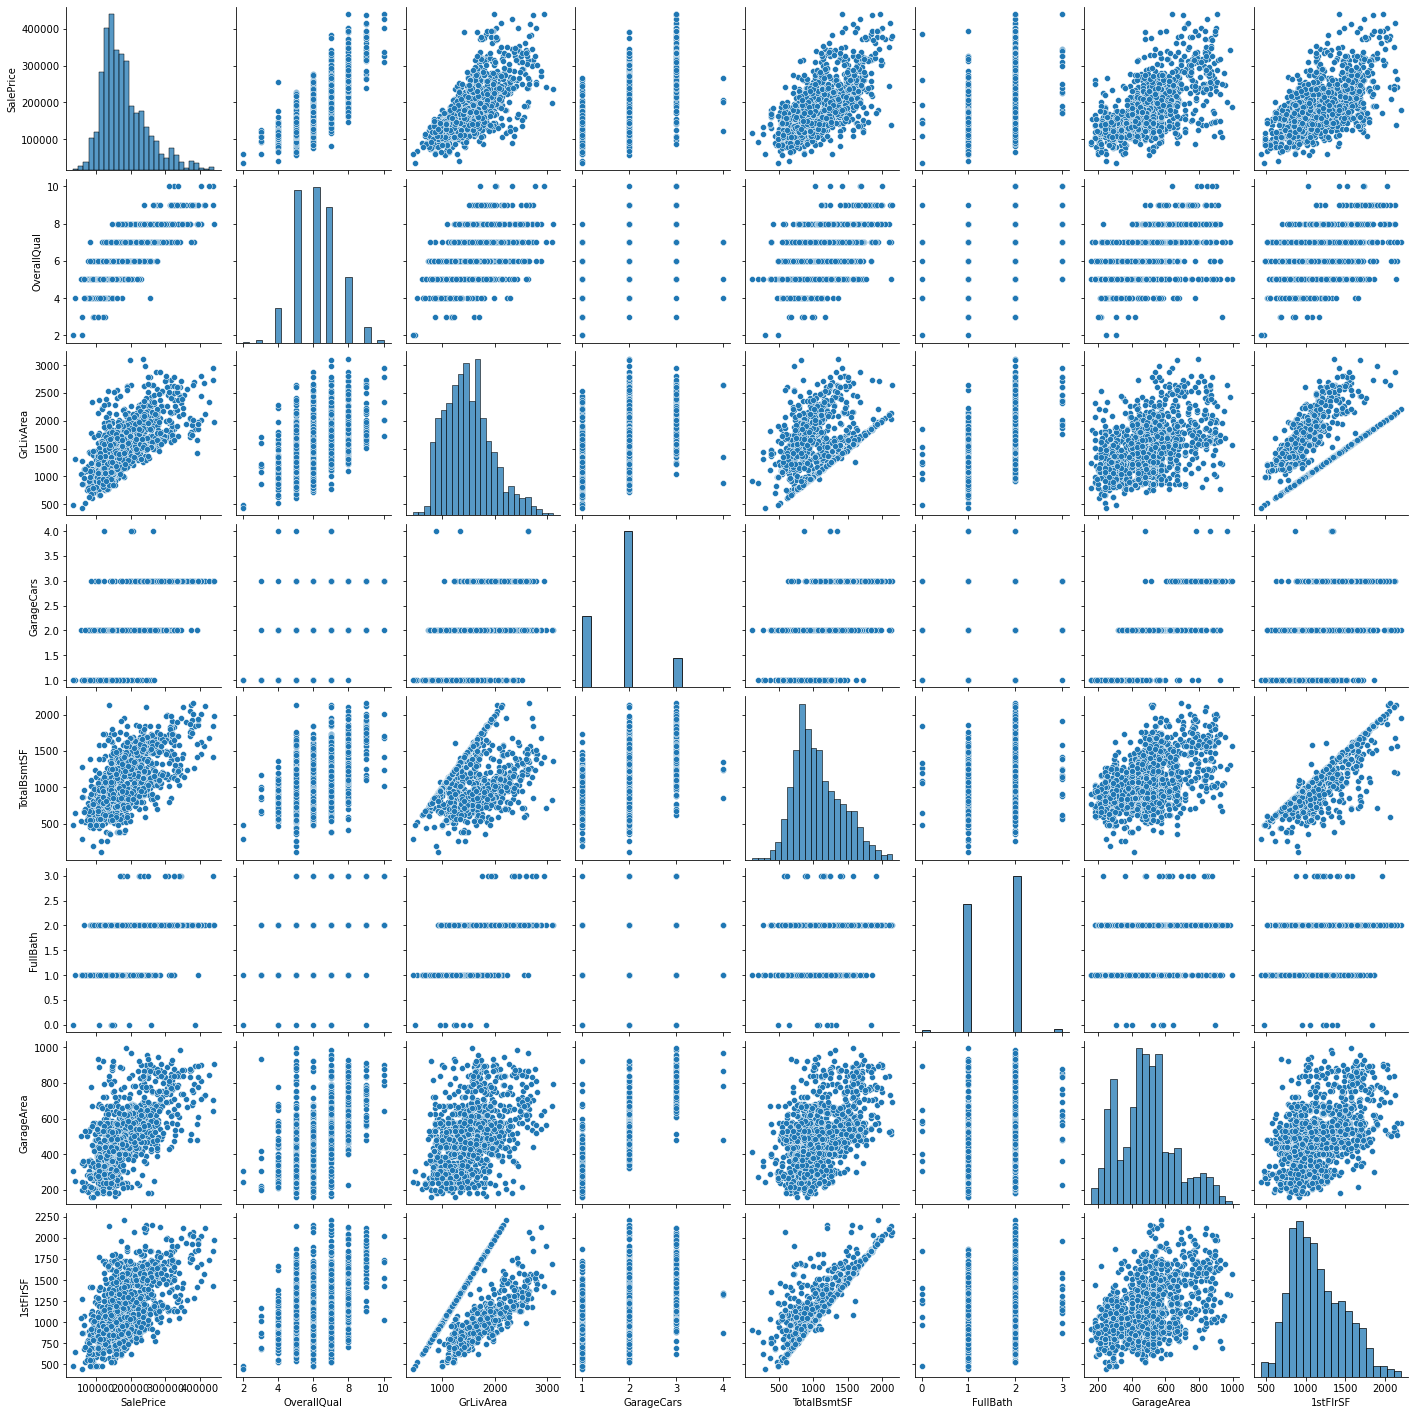

In [20]:
sns.pairplot(clean_data)
plt.show()

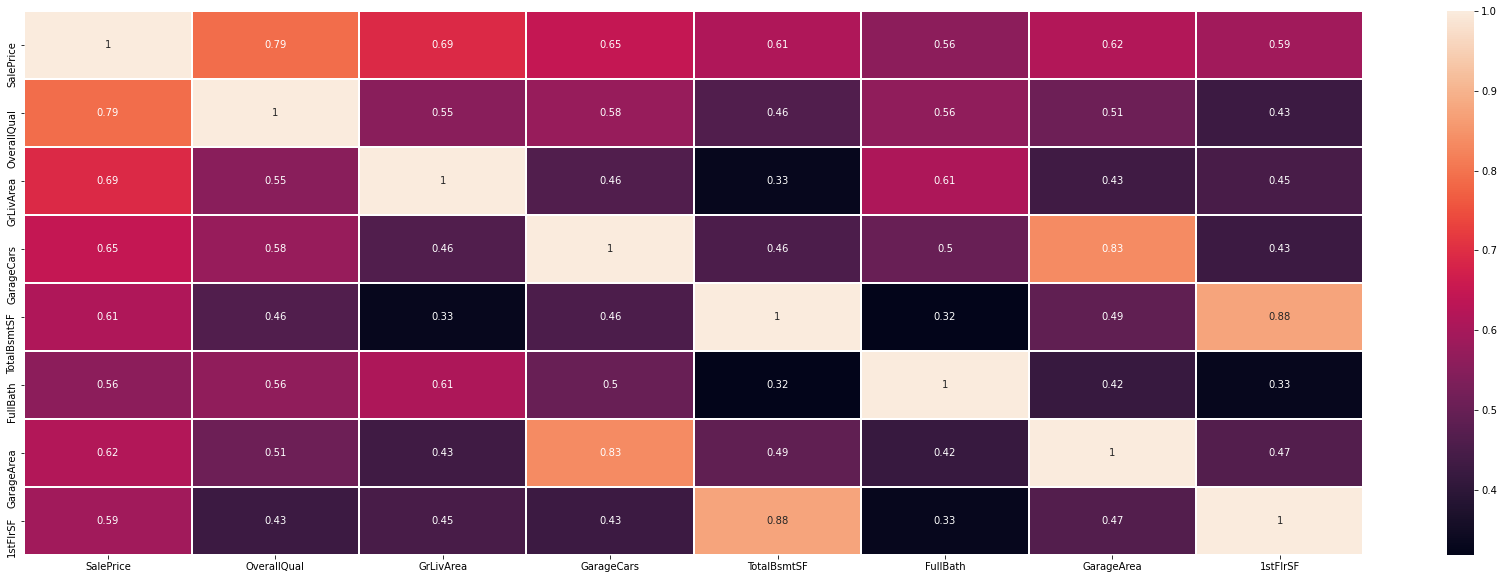

In [21]:
plt.figure(figsize=(30,10))
sns.heatmap(clean_data.corr(), linewidth=1, annot=True)
plt.show()

In [22]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
clean_data.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,GarageArea,1stFlrSF
0,208500,7,1710,2,856,2,548,856
1,181500,6,1262,2,1262,2,460,1262
2,223500,7,1786,2,920,2,608,920
3,140000,7,1717,3,756,1,642,961
4,250000,8,2198,3,1145,2,836,1145


In [24]:
X = clean_data.loc[:, ["OverallQual","GrLivArea","GarageCars","TotalBsmtSF","FullBath","GarageArea","1stFlrSF"]]
y = np.log(clean_data["SalePrice"])

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     703.1
Date:                Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:54:47   Log-Likelihood:                 537.07
No. Observations:                1306   AIC:                            -1058.
Df Residuals:                    1298   BIC:                            -1017.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.5368      0.023    452.490      

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [25]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif["features"] = X2.columns
vif

,VIF Factor,features
0,27.361857,const
1,2.017112,OverallQual
2,2.081477,GrLivArea
3,3.815786,GarageCars
4,4.974459,TotalBsmtSF
5,1.884529,FullBath
6,3.502116,GarageArea
7,5.005961,1stFlrSF


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [27]:
x = clean_data.loc[:, ["OverallQual","GrLivArea","GarageCars","TotalBsmtSF","FullBath","GarageArea","1stFlrSF"]]
y = np.log(clean_data["SalePrice"])

In [28]:
# Split data into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)


# The function to call linear regression on the train set
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [29]:
print("Coefficients: ", lm.coef_)
print("Intercept: ", lm.intercept_)

result = lm.predict(x_test)
result2 = lm.predict(x_train)
print('R^2: ', metrics.r2_score(y_test, result))
print('MSE: ', metrics.mean_squared_error(y_test,result))
print('R^2: ', metrics.r2_score(y_train, result2))
print('MSE: ', metrics.mean_squared_error(y_train,result2))

Coefficients:  [ 1.19551244e-01  2.35141305e-04  5.93301972e-02  2.21657917e-04
  1.81816081e-02  8.89380009e-05 -1.88687894e-06]
Intercept:  10.538552576883513
R^2:  0.8256155456019262
MSE:  0.02212785039133407
R^2:  0.7753786664470093
MSE:  0.02731270395355533


Text(0, 0.5, 'Predicted values')

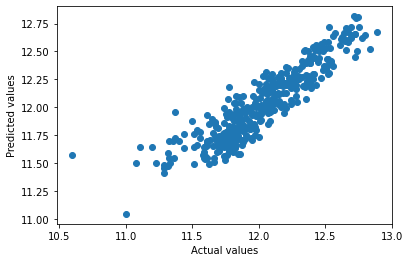

In [30]:
plt.scatter(y_test, result)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [31]:
test_result = pd.concat([x_test, y_test], axis=1)
test_result["y_hat"] = lm.predict(x_test)
test_result["residuals"] = y_test - lm.predict(x_test)

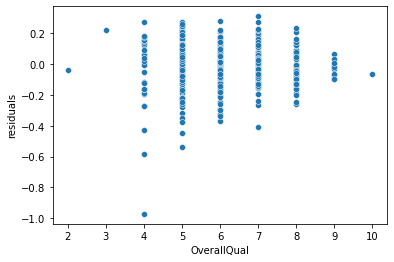

In [32]:
sns.scatterplot(data=test_result, x="OverallQual", y="residuals")

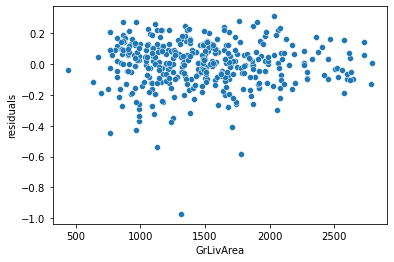

In [33]:
sns.scatterplot(data=test_result, x="GrLivArea", y="residuals")

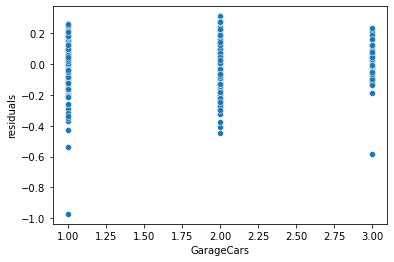

In [34]:
sns.scatterplot(data=test_result, x="GarageCars", y="residuals")

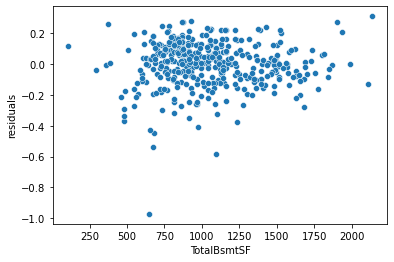

In [35]:
sns.scatterplot(data=test_result, x="TotalBsmtSF", y="residuals")

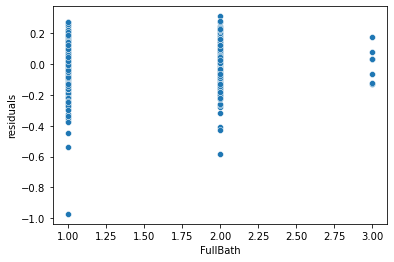

In [36]:
sns.scatterplot(data=test_result, x="FullBath", y="residuals")

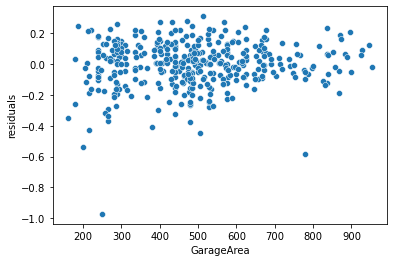

In [37]:
sns.scatterplot(data=test_result, x="GarageArea", y="residuals")

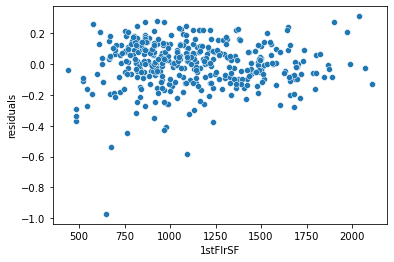

In [38]:
sns.scatterplot(data=test_result, x="1stFlrSF", y="residuals")

In [39]:
import xgboost as xgb


In [40]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
result1=xgb_model.predict(x_test)

In [42]:
print('R^2: ', metrics.r2_score(y_test, result1))
print('MSE: ', metrics.mean_squared_error(y_test,result1))

R^2:  0.7664506106912184
MSE:  0.02963535920360822


In [43]:
train2 = pd.get_dummies(train)

In [44]:
clean_data2= train2

In [53]:
train2

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex

In [45]:
quant_df2 = clean_data2.quantile([low, high])
quant_df2.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex

In [46]:
clean_data2 = clean_data2.loc[(clean_data2["GrLivArea"] < quant_df.loc[high, "GrLivArea"])&
                            (clean_data2["TotalBsmtSF"] > quant_df.loc[low, "TotalBsmtSF"]) &
                            (clean_data2["TotalBsmtSF"] < quant_df.loc[high, "TotalBsmtSF"]) &
                            (clean_data2["GarageArea"] > quant_df.loc[low, "GarageArea"]) &
                            (clean_data2["GarageArea"] < quant_df.loc[high, "GarageArea"])&
                            (clean_data2["1stFlrSF"] < quant_df.loc[high, "1stFlrSF"])&
                            (clean_data2["SalePrice"] > quant_df.loc[low, "SalePrice"])&
                            (clean_data2["SalePrice"] < quant_df.loc[high, "SalePrice"])]

In [47]:
X = clean_data2.loc[:, (clean_data2.columns != "SalePrice")]
y = np.log(clean_data2[["SalePrice"]])
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     80.14
Date:                Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:54:51   Log-Likelihood:                 1415.5
No. Observations:                1300   AIC:                            -2383.
Df Residuals:                    1076   BIC:                            -1225.
Df Model:                         223                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.06

In [48]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif["features"] = X2.columns
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
0,0.000000,const
1,1.217903,Id
2,36.767176,MSSubClass
3,2.372005,LotFrontage
4,3.621752,LotArea
5,4.893624,OverallQual
6,2.543428,OverallCond
7,16.777791,YearBuilt
8,3.845276,YearRemodAdd
9,2.868748,MasVnrArea


In [49]:
x = clean_data2.loc[:, (clean_data2.columns != "SalePrice")]
y = np.log(clean_data2[["SalePrice"]])

In [50]:
# Split data into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)
# The function to call linear regression on the train set
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [51]:
print("Coefficients: ", lm.coef_)
print("Intercept: ", lm.intercept_)

result = lm.predict(x_test)
result2 = lm.predict(x_train)
print('R^2: ', metrics.r2_score(y_test, result))
print('MSE: ', metrics.mean_squared_error(y_test,result))
print('R^2: ', metrics.r2_score(y_train, result2))
print('MSE: ', metrics.mean_squared_error(y_train,result2))

Coefficients:  [[-8.74514518e-06 -4.78703351e-04  4.01462528e-04  2.85477566e-06
   3.34104574e-02  3.97273266e-02  2.32493447e-03  5.52838451e-04
   1.62731896e-05  8.03463368e-05  2.67849955e-05 -4.26130025e-06
   1.02870031e-04  1.02272163e-04  9.51580608e-05 -4.19169478e-05
   1.55513278e-04  1.12682590e-02  2.97954087e-03  1.91423586e-02
   1.95525012e-02  7.17941535e-03 -5.76116389e-02  1.59492001e-03
   2.71901720e-02  1.53316318e-02  9.81892571e-05  8.92914203e-05
   1.43815481e-04  6.28507135e-05  1.72608682e-04  2.32358586e-04
   2.52871841e-04  4.12138489e-06  2.00478526e-03  5.73863035e-04
  -2.24718384e-01  9.26389319e-02  7.69500255e-02  6.21087026e-02
  -6.97927621e-03 -8.37051761e-02  8.37051761e-02  4.98828869e-03
  -2.32108687e-03  2.72817256e-03 -5.39537438e-03  4.38405308e-02
   3.52886677e-03 -2.97961133e-02 -1.75732844e-02  1.15168410e-01
  -1.15168410e-01  1.98595389e-02  3.69887193e-02 -1.61082710e-02
  -4.97470882e-02  9.00710098e-03  6.85503858e-02  6.97047568

Text(0, 0.5, 'Predicted values')

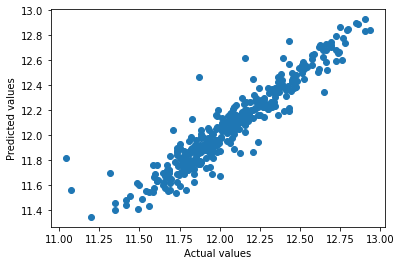

In [52]:
plt.scatter(y_test, result)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")